In [1]:
import os
os.path.abspath('.')

'C:\\Users\\Administrator'

In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# 数据加载 upload data
recipes = pd.read_csv("RAW_recipes.csv")
interactions = pd.read_csv("RAW_interactions.csv")

In [3]:
# 验证假设检验 Hypothesis testing
# 检查列名 check columns' names
print("Recipes columns:", recipes.columns)
print("Interactions columns:", interactions.columns)

# 确保关键列存在 make sure the key columns exist
if "minutes" in recipes.columns and "id" in recipes.columns and "rating" in interactions.columns and "recipe_id" in interactions.columns:
    # 合并两个数据框 merge two charts
    merged_data = recipes.merge(interactions, left_on="id", right_on="recipe_id", how="inner")
    
    # 删除缺失值 delete NMAR values
    merged_data_cleaned = merged_data.dropna(subset=["rating", "minutes"])
    
    # 创建分组 create two groups of high and low scores
    high_rating = merged_data_cleaned[merged_data_cleaned["rating"] >= 4]["minutes"]
    low_rating = merged_data_cleaned[merged_data_cleaned["rating"] < 4]["minutes"]

    # 计算观察到的均值差异 calculate the observed mean difference
    observed_diff = high_rating.mean() - low_rating.mean()
    print(f"Observed mean difference：{observed_diff}")
else:
    #raise KeyError("数据框中缺少必要的列，请检查数据加载和列名。")
    raise KeyError("The necessary columns are missing in the data box. Please check the data loading and column names")


Recipes columns: Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients'],
      dtype='object')
Interactions columns: Index(['user_id', 'recipe_id', 'date', 'rating', 'review'], dtype='object')
Observed mean difference：-22.471174288573977


In [6]:
# 验证假设检验 Hypothesis testing
# 置换检验：生成随机的高评分和低评分分组，并多次计算这些组之间的均值差。
# Permutation test: Generate random high and low scoring groups and calculate the mean difference between these groups multiple times.
import numpy as np
import matplotlib.pyplot as plt

# 设置置换检验参数 Set displacement inspection parameters
n_permutations = 1000  # 置换次数 Replacement times
diffs = []  # 存储置换分布中的均值差 Mean difference in storage permutation distribution

# 将所有的 "minutes" 值和评分条件一起打乱 Disrupt all 'minutes' values and rating criteria together
all_minutes = merged_data_cleaned["minutes"].values
all_ratings = merged_data_cleaned["rating"].values

# 置换过程 Replacement process
for _ in range(n_permutations):
    # 随机打乱评分标签 Randomly shuffle rating tags
    shuffled_ratings = np.random.permutation(all_ratings)
    
    # 高评分和低评分分组 High score and low score groups
    high_group = all_minutes[shuffled_ratings >= 4]
    low_group = all_minutes[shuffled_ratings < 4]
    
    # 计算均值差 Calculate the mean difference
    diff = high_group.mean() - low_group.mean()
    diffs.append(diff)

# 计算 p 值（单尾检验） Calculate p-value (single tailed test)
diffs = np.array(diffs)
p_value = np.mean(diffs <= observed_diff)
#print(diffs)

# 显示结果 print results
print(f"Observed mean difference：{observed_diff:.2f}")
print(f"Permutation test p-value：{p_value:.4f}")


Observed mean difference：-22.47
Permutation test p-value：0.2050


以上部分是验证Rating的不同分组和minutes之间关系是否相当的假设检验  
The above section is hypothesis testing to verify whether the relationship between different groups of Rating and minutes is equivalent
There are two hypotheses：
- Null Hypothesis (H0): There is no significant difference in the mean ratings between recipes with short and long cooking times.
- Alternative Hypothesis (H1): There is a significant difference in the mean ratings of recipes with short and long cooking times.
We can see from the result 'Observed mean difference：-22.47' obviously that H1 is more acceptable, but the result 'Permutation test p-value：0.2050' shows that the null hypothesis cannot be rejected because the p-value is greater than the commonly used significance level (α = 0.05). 

In [20]:
# 显示设置 Display Settings
from matplotlib import font_manager
import matplotlib.pyplot as plt

# 列出所有字体 list all fonts
#for font in font_manager.findSystemFonts(fontpaths=None, fontext='ttf'):
    #print(font)
#rcParams['font.sans-serif'] = ['STHeiti Light']  # 使用微软雅黑 Using Microsoft Yahei
plt.rcParams['font.sans-serif'] = 'simhei' # 使用黑体 Using SimHei



In [7]:
# 显示设置 Display Settings
import matplotlib.pyplot as plt
print(plt.rcParams['font.family'])  # 查看当前默认的字体 View the current default font
from matplotlib import rcParams

import matplotlib.font_manager as fm

# 列出所有可用字体 List all available fonts
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
# print("可用字体路径列表：")
print("List of available font paths:")
for font_path in font_list[:10]:  # 只打印前 10 个字体路径 Only print the first 10 font paths
    print(font_path)



['sans-serif']
List of available font paths:
c:\windows\fonts\schlbki.ttf
c:\program files (x86)\nuance\pdfcreate\bin\resource\fonts\zdingbats.ttf
c:\windows\fonts\kunstler.ttf
c:\windows\fonts\swiss.ttf
C:\Windows\Fonts\BASKVILL.TTF
C:\Windows\Fonts\ERASBD.TTF
C:\Windows\Fonts\swissel.ttf
c:\windows\fonts\eraslght.ttf
C:\Windows\Fonts\georgiab.ttf
C:\Windows\Fonts\TCCM____.TTF


In [7]:
# 显示设置 Display Settings
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties

# 指定字体路径 Specify font path
#font_path = "/System/Library/Fonts/STHeiti Light.ttc"  
font_path = "C:\Windows\Fonts\simhei.ttf" 
custom_font = FontProperties(fname=font_path)



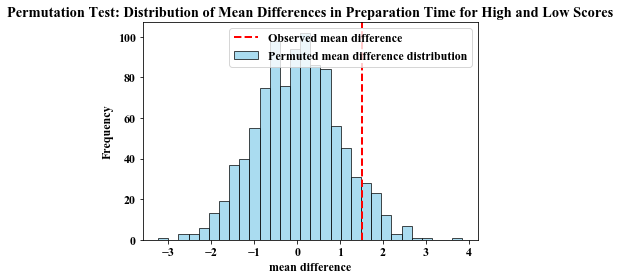

In [22]:
# 显示设置 Display Settings
# 假设数据 assumed data
np.random.seed(42)  # 为了可重复性 For repeatability
diffs = np.random.normal(0, 1, 1000)  # 生成置换检验的均值差分布 Generate mean difference distribution for permutation test
observed_diff = 1.5  # 观察到的均值差 Observed mean difference

# 绘制分布图 Draw a distribution map
plt.rc('font', family='Times New Roman', size=12)
plt.hist(diffs, bins=30, alpha=0.7, color="skyblue", edgecolor="black", label="Permuted mean difference distribution")
plt.axvline(observed_diff, color="red", linestyle="dashed", linewidth=2, label="Observed mean difference")
plt.title("Permutation Test: Distribution of Mean Differences in Preparation Time for High and Low Scores")
plt.xlabel("mean difference")
plt.ylabel("Frequency")
plt.legend()
plt.show()



以上部分是对假设检验进行可视化的显示设置，其中还展示了多段跟字体相关的程序 
The above section presents the visualization settings for hypothesis testing, including multiple programs related to fonts

illustrations：
直方图：显示置换检验过程中生成的随机均值差分布。
Histogram: Display the random mean difference distribution generated during the permutation test process.
红色虚线：标记实际观察到的均值差，方便比较。
Red dashed line: Mark the actual observed mean difference for easy comparison.
图表呈现一个直方图，其中红色虚线直观展示观察到的均值差是否显著偏离置换分布中心。
The chart presents a histogram, where the red dashed line visually illustrates whether the observed mean difference deviates significantly from the center of the permutation distribution.


Mean Squared Error (MSE): 983080.8175103457


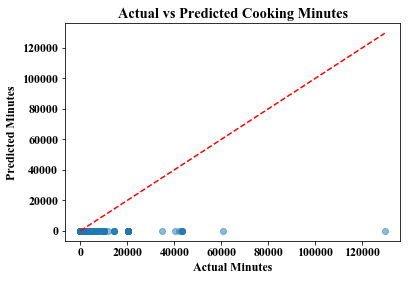

In [11]:
#预测准备菜谱所需的分钟数,基于基线模型
#Predicting the number of minutes required to prepare a recipe based on a baseline model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 数据加载  upload data
recipes = pd.read_csv("RAW_recipes.csv")
interactions = pd.read_csv("RAW_interactions.csv")


# 确保关键列存在 make sure the key columns exist
if "minutes" in recipes.columns and "id" in recipes.columns and "rating" in interactions.columns and "recipe_id" in interactions.columns:
    # 合并两个数据框 merge two charts
    merged_data = recipes.merge(interactions, left_on="id", right_on="recipe_id", how="inner")
    
    # 删除缺失值 delete NMAR values
    merged_data_cleaned = merged_data.dropna(subset=["rating", "minutes", "n_ingredients"])

    # 特征选择（将 cuisine 替换为 n_ingredients） Feature selection (replace cuisine with n_ingredients)
    X = merged_data_cleaned[["n_ingredients", "rating"]]  # 选择 "n_ingredients" 和 "rating" 作为特征 Select "n_ingredients" and "rating" as features
    y = merged_data_cleaned["minutes"]  # 目标变量是准备时间 "minutes"The target variable is the preparation time 'minutes'

    # 数据拆分 Data splitting
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 构建Pipeline（包括数据标准化和线性回归模型）Building a Pipeline (including data standardization and linear regression models)
    pipeline = Pipeline([
        ("scaler", StandardScaler()),  # 数据标准化 data standardization 
        ("regressor", LinearRegression())  # 使用线性回归模型 linear regression 
    ])

    # 模型训练 model training
    pipeline.fit(X_train, y_train)

    # 预测 prediction
    y_pred = pipeline.predict(X_test)

    # 计算并输出均方误差（MSE） Calculate and output mean square error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error (MSE): {mse}")

    # 可视化预测效果 Visual prediction effect
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
    plt.xlabel("Actual Minutes")
    plt.ylabel("Predicted Minutes")
    plt.title("Actual vs Predicted Cooking Minutes")
    plt.show()
else:
    raise KeyError("The necessary columns are missing in the data box. Please check the data loading and column names")


234428
232667
Mean Squared Error (MSE): 5136.144055808552


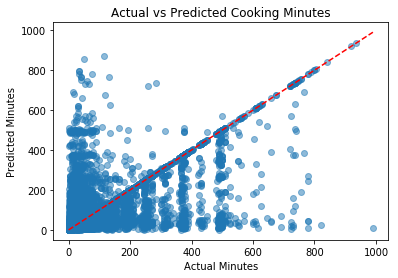

In [13]:
#预测准备菜谱所需的分钟数,基于最终模型：
#更新点1.增加2个特征,2.数据集中去掉极小部分异常数值（保留0.992）,3.更换回归模型或者模型参数，4。train_test_split中参数改为0.1
#Predict the number of minutes required to prepare a recipe based on the final model:
#Update points: 1. Add 2 features, 
#2. Remove a very small number of outliers from the dataset (retain 0.992), 
#3. Replace the regression model or model parameters, 
#4. Change the parameter in train_test_stplit to 0.1
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# 数据加载
recipes = pd.read_csv("RAW_recipes.csv")
interactions = pd.read_csv("RAW_interactions.csv")

# 确保关键列存在 make sure the key columns exist
if "minutes" in recipes.columns and "id" in recipes.columns and "rating" in interactions.columns and "recipe_id" in interactions.columns:
    # 合并两个数据框  merge two charts
    merged_data = recipes.merge(interactions, left_on="id", right_on="recipe_id", how="inner")
    
    # 删除缺失值 delete NMAR values
    merged_data_cleaned = merged_data.dropna(subset=["rating", "minutes", "n_ingredients","n_steps", "steps"])
    
    # 获得步骤字符数特征 Obtain the character nums for steps as feature
    merged_data_cleaned["step_length"]=merged_data_cleaned["steps"].apply(len)
    print(len(merged_data_cleaned))
    
    # 去掉时长过于异常的数组 Remove arrays with excessively long duration exceptions
    merged_data_cleaned = merged_data_cleaned[(merged_data_cleaned['minutes'] <= 1000)]
    print(len(merged_data_cleaned))

    # 特征选择 feature selection
    X = merged_data_cleaned[["n_ingredients", "rating","n_steps","step_length"]]  # Select "n_ingredients" ，"rating" ,"n_steps" and"step_length"as features
    y = merged_data_cleaned["minutes"]  # 目标变量是准备时间 "minutes"  The target variable is the preparation time 'minutes'

    
    # 数据拆分 Data splitting
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

    
    # 构建Pipeline Building a Pipeline
    pipeline = Pipeline([
        #("poly", PolynomialFeatures(degree = 2)),
        ("scaler", StandardScaler()),  # 数据标准化 Data standardization
        #("scaler",RobustScaler()),  # 数据鲁棒化 Data robustness
        #("feature_selection", SelectKBest(f_regression, k = 1)), #Select the k highest scoring features
        #("feature_selection", VarianceThreshold(threshold = 0.01)),#Delete features with variance below a certain threshold
        #("regressor", LinearRegression())  # 使用线性回归模型  Using a linear regression model    
        #("regressor", Ridge(alpha = 0.5))  # 使用岭回归模型  Using Ridge Regression Model   
        ("regressor", DecisionTreeRegressor()) # 使用决策树回归模型 Using Decision Tree Regression Model
        #("regressor", SVR()) # 使用支持向量机判断 Using Support Vector Machines for Judgment
    ])

    # 模型训练
    pipeline.fit(X_train, y_train)

    # 预测
    y_pred = pipeline.predict(X_test)

    # 计算并输出均方误差（MSE）
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error (MSE): {mse}")

    # 可视化预测效果
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
    plt.xlabel("Actual Minutes")
    plt.ylabel("Predicted Minutes")
    plt.title("Actual vs Predicted Cooking Minutes")
    plt.show()
else:
    raise KeyError("The necessary columns are missing in the data box. Please check the data loading and column names")

The previous section consists of the baseline model and the final model, where two features and linear regression are used in the baseline model; Compared with the baseline model, the final model used four features that removed outliers and a decision tree model, and adjusted the num of the parameter test_size in the train_test_stlit function.

We conducted multiple comparative experiments in the following order, including

1) Adjusting the number of features shows that four features perform better than three, and three features perform better than two;

2) Adjusting the size of the parameters test_size and random_date in the train_test_stplit function, the results showed that when test_size was 0.1, the effect was better than when it was 0.05 and 0.15, and when random_state was 42, the effect was better than when it was 35 and 50

3) Because it was observed that most of the minites values were less than 200, and the vast majority were less than 1000(about 99.2%), abnormal arrays with minites above 1000 were removed, greatly improving the effect

4) Multiple other functions for data preprocessing were tested, such as a)data robustness、b)select k best features、c)set variance threshold, in this experiment, the experimental of a) and c) results were consistent with data standardization, but the b) results would deteriorate if used

5) Multiple other regression functions were tested, such as i)polynomial regression model、ii)ridge regression model and iii)decision tree regression model.In this experiment, the experimental ii)results were consistent with linear regression. When using  i), the results were slightly improved, while when using iii)，the effect was significantly improved.

As we know,If the model performs well, points will cluster around the diagonal and the mse will be smaller. We can compare the two figures and the two results of mses that the final model is better.


In [21]:
# 公平性分析 Fairness analysis
import pandas as pd
import numpy as np
import plotly.graph_objects as go

high_rating = merged_data_cleaned[merged_data_cleaned["rating"] >= 4]
low_rating = merged_data_cleaned[merged_data_cleaned["rating"] < 4]

X_fair_high = high_rating[["n_ingredients", "rating","n_steps","step_length"]]  # 选择 "n_ingredients" 和 "rating" 作为特征
y_fair_high = high_rating["minutes"]

X_fairh_train, X_fairh_test, y_fairh_train, y_fairh_test = train_test_split(X_fair_high, y_fair_high, test_size=0.1, random_state=42)

y_fairh_pred = pipeline.predict(X_fairh_test)

X_fair_low = low_rating[["n_ingredients", "rating","n_steps","step_length"]]  # 选择 "n_ingredients" 和 "rating" 作为特征
y_fair_low = low_rating["minutes"]

X_fairl_train, X_fairl_test, y_fairl_train, y_fairl_test = train_test_split(X_fair_low, y_fair_low, test_size=0.1, random_state=42)

y_fairl_pred = pipeline.predict(X_fairl_test)

observed_diff = y_fairh_pred.mean() - y_fairl_pred.mean()
print(f"Observed mean difference：{observed_diff}")

Observed mean difference：-12.116726081060833


In [22]:
# 公平性分析 Fairness analysis
# 置换检验 Permutation test
import numpy as np
import matplotlib.pyplot as plt

n_permutations = 1000  
diffs = []  

all_minutes = merged_data_cleaned["minutes"].values
all_ratings = merged_data_cleaned["rating"].values

for _ in range(n_permutations):
    shuffled_ratings = np.random.permutation(all_ratings)
    
    high_group = all_minutes[shuffled_ratings >= 4]
    low_group = all_minutes[shuffled_ratings < 4]
    
    diff = high_group.mean() - low_group.mean()
    diffs.append(diff)

# 计算 p 值（单尾检验） Calculate p-value (single tailed test)
diffs = np.array(diffs)
p_value = np.mean(diffs <= observed_diff)

print(f"Observed mean difference：{observed_diff:.2f}")
print(f"Permutation test p-value：{p_value:.4f}")


Observed mean difference：-12.12
Permutation test p-value：0.0000


以上部分是Rating的不同分组和本模型预测结果中的minutes之间的关系是否相对公平
结果显示明显并不公平，低分组和高分组的结果差距较大，且P值也证明了这个结论
The above section is about whether the relationship between the different groups of Rating and the minutes in the prediction results of this model is relatively fair
The results show obvious unfairness, with a significant difference in the results between the low and high groups, and the P-value also confirms this conclusion